# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Bintan Dinar Artamevia
- **Email:** m012d4kx2898@bangkit.academy
- **ID Dicoding:** bintandinar

## Menentukan Pertanyaan Bisnis

- Di musim apa pelanggan paling banyak melakukan rental sepeda?
- Bagaimana pengaruh temperatur terhadap jumlah rental sepeda?
- Bagaimana performa rental sepeda tiap bulannya?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("Bike-sharing-dataset/day.csv")
hour_df = pd.read_csv("Bike-sharing-dataset/hour.csv")

In [22]:
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df.head(5)

### Assessing Data

Melihat info data type dataframe

In [ ]:
day_df.info()

#dteday harusnya datetime

In [ ]:
hour_df.info()

#dteday jg harusnya datetime

Melihat duplikasi data

In [ ]:
print("Jumlah duplikasi table day_df: ",day_df.duplicated().sum())
day_df.describe()

In [ ]:
print("Jumlah duplikasi table hour_df: ",hour_df.duplicated().sum())
hour_df.describe()

Melihat missing value

In [ ]:
print("Missing Value Pada Dataframe Day:")
day_df.isna().sum()

#Tidak ada missing value

In [ ]:
print("Missing Value Pada Dataframe Hour:")
hour_df.isna().sum()

#Tidak ada missing value

### Cleaning Data

Mengganti data type dteday pada dataframe day_df dan hour_df

In [ ]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [ ]:
day_df.info()

In [ ]:
hour_df.info()

## Exploratory Data Analysis (EDA)

### Explore ...

In [24]:
# Melihat jumlah rental sepeda berdasarkan musim
day_df.groupby(by="season").cnt.nunique()

season
1    179
2    182
3    188
4    176
Name: cnt, dtype: int64

In [85]:
# Melihat rata-rata temperatur dan jumlah rental sepeda berdasarkan weathersit
day_df.groupby(by="weathersit").agg({
  "temp": "mean",
  "cnt":  "sum"
})

,temp,cnt
weathersit,,
1,0.511541,2257952
2,0.470366,996858
3,0.433440,37869


In [87]:
# Melihat performa rental sepeda tiap bulan
day_df.groupby(by="mnth").cnt.nunique()

mnth
1     62
2     57
3     60
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: cnt, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Di musim apa pelanggan paling banyak melakukan rental sepeda?

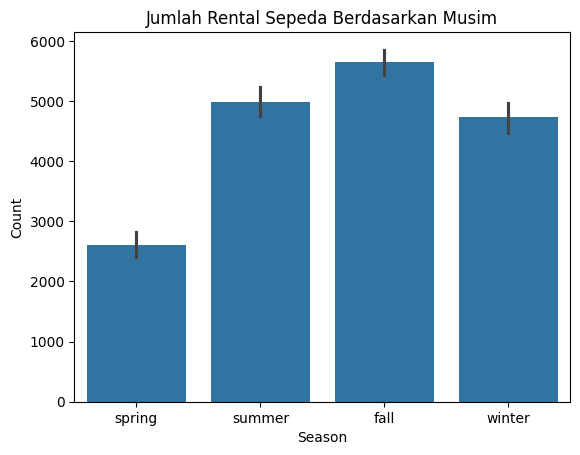

In [92]:
count_based_on_season = day_df.groupby(by="season").cnt.nunique()
sns.barplot(data=day_df, x='season', y='cnt')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Jumlah Rental Sepeda Berdasarkan Musim')
plt.xticks(range(0, 4), ['spring', 'summer', 'fall', 'winter'])
plt.show()

### Pertanyaan 2: Bagaimana pengaruh temperatur terhadap jumlah rental sepeda?

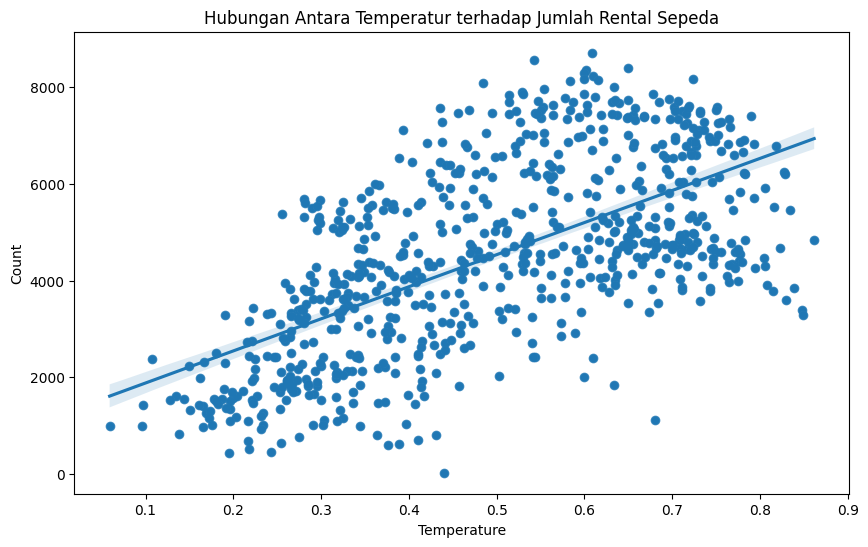

In [84]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_df, x='temp', y='cnt')
sns.regplot(data=day_df, x='temp', y='cnt')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Hubungan Antara Temperatur terhadap Jumlah Rental Sepeda')
plt.show()

### Pertanyaan 3: Bagaimana performa rental sepeda tiap bulannya?

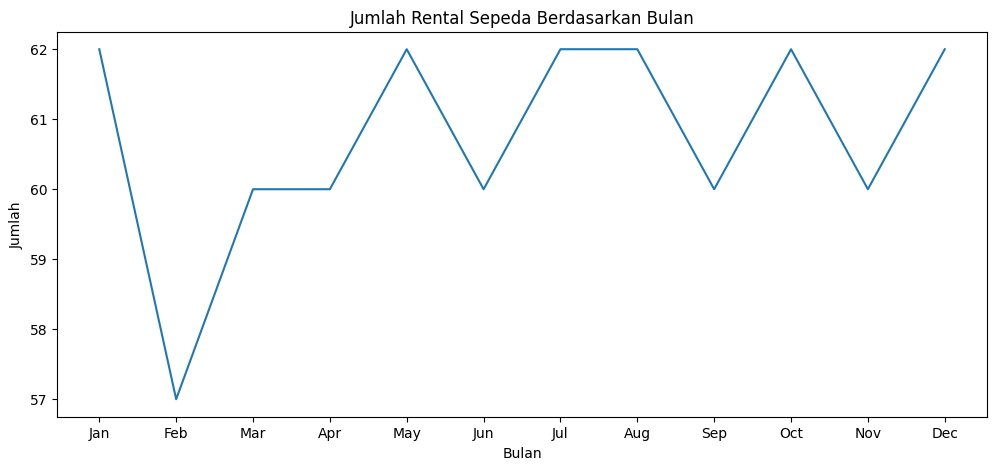

In [94]:
count_based_on_month = day_df.groupby(by="mnth").cnt.nunique()
plt.figure(figsize=(12, 5))
plt.plot(count_based_on_month)
plt.xlabel("Bulan")
plt.ylabel("Jumlah")
plt.title("Jumlah Rental Sepeda Berdasarkan Bulan")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


## Conclusion

- Conclution pertanyaan 1:
  Berdasarkan bar plot yang telah dibuat visualisasinya, musim yang memiliki jumlah rental tertinggi adalah musim gugur dengan total jumlah rental sepeda mencapai 5500 
- Conclution pertanyaan 2:
  Berdasarkan scatter plot yang telah dibuat, terdapat hubungan korelasi yang positif antara temperatur dan jumlah rental sepeda. Artinya, semakin tinggi temperaturnya, maka 
  semakin besar jumlah rental sepeda.
- Conclution pertanyaan 3:
  Berdasarkan line plot yang telah dibuat, jumlah rental sepeda yang paling rendah ada di bulan Februari dengan jumlah 57 dan jumlah rental sepeda paling tinggi ada di bulan   
  Januari, Mei, Juli, Agustus, Oktober, dan Desember